# [Tarea 08] Ejercicios Unidad 03-C mínimos cuadrados
### nombre: Francisco Adrian Correa Anrango
### Fecha : 08/01/2025


link de github: https://github.com/afca2002/-Tarea-08-Ejercicios-Unidad-03-C-m-nimos-cuadrados.git
## Indicaciones:
* En todos los ejercicios debe graficar los puntos dados y la/s línea/s ajustadas. 
* Subir el código con la resolución de los ejercicios en un repositorio público en Github. 
* Incluir enlace de su repositorio.  
* Subir archivo pdf.
* Puede realizar los cálculos a mano, o utilizar cualquier librería o implementar su propia función. 

# Ejercicio 1

### Dados los datos:

| \(x_i\) | 4.0    | 4.2    | 4.5    | 4.7    | 5.1    | 5.5    | 5.9    | 6.3   | 6.8   | 7.1   |
|---------|--------|--------|--------|--------|--------|--------|--------|-------|-------|-------|
| \(y_i\) | 102.56 | 130.11 | 113.18 | 142.05 | 167.53 | 195.14 | 224.87 | 256.73| 299.50| 326.72|

### Resolver:

a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.  
b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.  
c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.  
d. Construya el polinomio por mínimos cuadrados de la forma $be^{ax}$ y calcule el error.  
e. Construya el polinomio por mínimos cuadrados de la forma $bx^a$ y calcule el error.


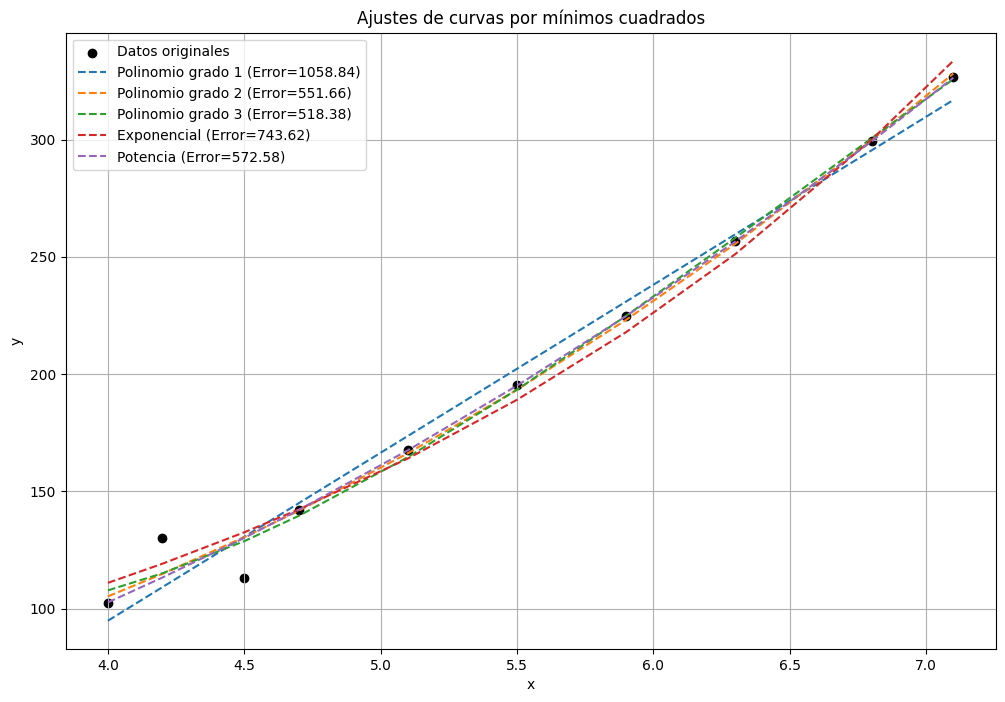

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xi = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
yi = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

def exp_func(x, a, b):
    return b * np.exp(a * x)

def power_func(x, a, b):
    return b * x**a

p1 = np.polyfit(xi, yi, 1)
p2 = np.polyfit(xi, yi, 2)
p3 = np.polyfit(xi, yi, 3)

params_exp, _ = curve_fit(exp_func, xi, yi)
a_exp, b_exp = params_exp

params_power, _ = curve_fit(power_func, xi, yi)
a_power, b_power = params_power

error_p1 = np.sum((yi - np.polyval(p1, xi))**2)
error_p2 = np.sum((yi - np.polyval(p2, xi))**2)
error_p3 = np.sum((yi - np.polyval(p3, xi))**2)
error_exp = np.sum((yi - exp_func(xi, *params_exp))**2)
error_power = np.sum((yi - power_func(xi, *params_power))**2)

plt.figure(figsize=(12, 8))
plt.scatter(xi, yi, color='black', label='Datos originales')
plt.plot(xi, np.polyval(p1, xi), label=f'Polinomio grado 1 (Error={error_p1:.2f})', linestyle='--')
plt.plot(xi, np.polyval(p2, xi), label=f'Polinomio grado 2 (Error={error_p2:.2f})', linestyle='--')
plt.plot(xi, np.polyval(p3, xi), label=f'Polinomio grado 3 (Error={error_p3:.2f})', linestyle='--')
plt.plot(xi, exp_func(xi, *params_exp), label=f'Exponencial (Error={error_exp:.2f})', linestyle='--')
plt.plot(xi, power_func(xi, *params_power), label=f'Potencia (Error={error_power:.2f})', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajustes de curvas por mínimos cuadrados')
plt.legend()
plt.grid()
plt.show()


# Ejercicio 2

### Repita el ejercicio 5 para los siguientes datos
| xi   | 0.2   | 0.3   | 0.6   | 0.9   | 1.1   | 1.3   | 1.4   | 1.6   |
|------|-------|-------|-------|-------|-------|-------|-------|-------|
| yi   | 0.0504|0.0984 |0.3328 |0.7266 |1.0972 |1.5697 |1.8487 |2.5015 |


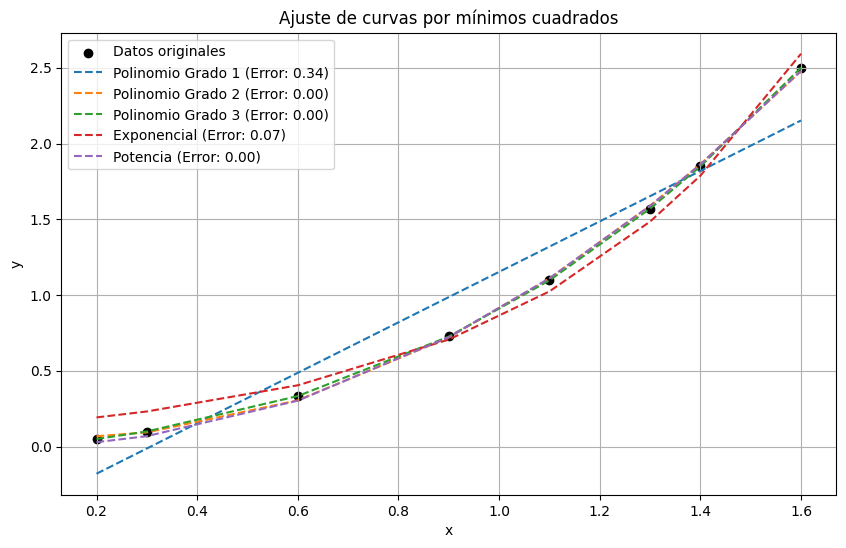

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos iniciales
xi = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yi = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])

# Definición de funciones para ajustes
# Ajuste exponencial
def ajuste_exponencial(x, a, b):
    return b * np.exp(a * x)

# Ajuste de potencia
def ajuste_potencia(x, a, b):
    return b * x**a

# Ajustes polinomiales de grado 1, 2 y 3
polinomio_grado_1 = np.polyfit(xi, yi, 1)
polinomio_grado_2 = np.polyfit(xi, yi, 2)
polinomio_grado_3 = np.polyfit(xi, yi, 3)

# Ajustes no lineales
parametros_exponencial, _ = curve_fit(ajuste_exponencial, xi, yi)
parametros_potencia, _ = curve_fit(ajuste_potencia, xi, yi)

# Cálculo de errores
error_grado_1 = np.sum((yi - np.polyval(polinomio_grado_1, xi))**2)
error_grado_2 = np.sum((yi - np.polyval(polinomio_grado_2, xi))**2)
error_grado_3 = np.sum((yi - np.polyval(polinomio_grado_3, xi))**2)
error_exponencial = np.sum((yi - ajuste_exponencial(xi, *parametros_exponencial))**2)
error_potencia = np.sum((yi - ajuste_potencia(xi, *parametros_potencia))**2)

# Gráfico de resultados
plt.figure(figsize=(10, 6))
plt.scatter(xi, yi, color='black', label='Datos originales')
plt.plot(xi, np.polyval(polinomio_grado_1, xi), label=f'Polinomio Grado 1 (Error: {error_grado_1:.2f})', linestyle='--')
plt.plot(xi, np.polyval(polinomio_grado_2, xi), label=f'Polinomio Grado 2 (Error: {error_grado_2:.2f})', linestyle='--')
plt.plot(xi, np.polyval(polinomio_grado_3, xi), label=f'Polinomio Grado 3 (Error: {error_grado_3:.2f})', linestyle='--')
plt.plot(xi, ajuste_exponencial(xi, *parametros_exponencial), label=f'Exponencial (Error: {error_exponencial:.2f})', linestyle='--')
plt.plot(xi, ajuste_potencia(xi, *parametros_potencia), label=f'Potencia (Error: {error_potencia:.2f})', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de curvas por mínimos cuadrados')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 3

 La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos.

| Puntuación ACT  |Promedio de puntos | Puntuación ACT | Promedio de puntos |
|-----------------|-------------------|-----------------|-------------------|
| 28             | 3.84             | 29             | 3.75             |
| 25             | 3.21             | 28             | 3.65             |
| 28             | 3.23             | 27             | 3.87             |
| 27             | 3.63             | 29             | 3.12             |
| 28             | 3.75             | 26             | 3.16             |
| 33             | 3.20             | 28             | 2.92             |
| 29             | 3.41             | 30             | 3.10             |
| 28             | 2.96             | 23             | 3.53             |
| 29             | 3.33             | 27             | 2.03             |
| 27             | 3.53             | 24             | 2.81             |


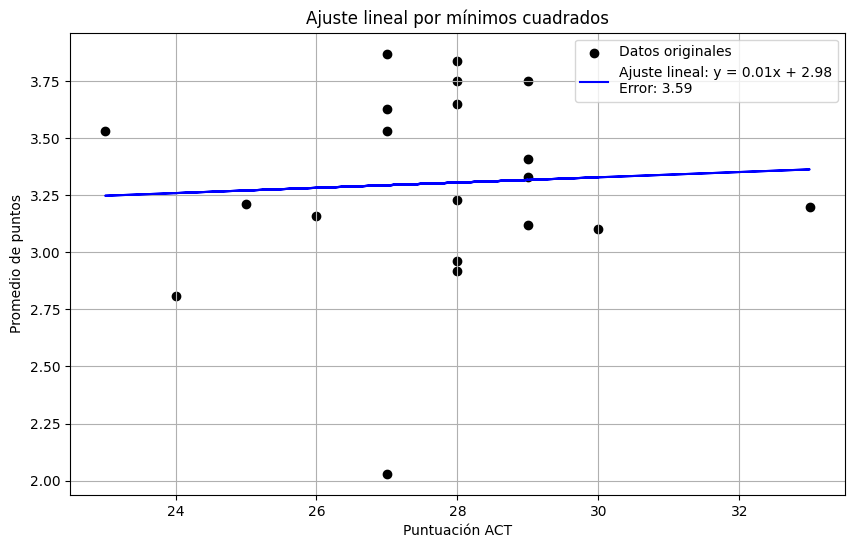

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
act_scores = np.array([28, 25, 28, 27, 28, 33, 29, 28, 29, 27, 29, 28, 27, 29, 26, 28, 30, 23, 27, 24])
average_scores = np.array([3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 2.96, 3.33, 3.53, 3.75, 3.65, 3.87, 3.12, 3.16, 2.92, 3.10, 3.53, 2.03, 2.81])

# Ajuste lineal
coeficientes = np.polyfit(act_scores, average_scores, 1)
pendiente, interseccion = coeficientes

# Error cuadrático
error = np.sum((average_scores - np.polyval(coeficientes, act_scores))**2)

plt.figure(figsize=(10, 6))
plt.scatter(act_scores, average_scores, color='black', label='Datos originales')
plt.plot(act_scores, np.polyval(coeficientes, act_scores), color='blue', label=f'Ajuste lineal: y = {pendiente:.2f}x + {interseccion:.2f}\nError: {error:.2f}')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Ajuste lineal por mínimos cuadrados')
plt.legend()
plt.grid()
plt.show()

## Ejercicio 4 

El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las 
características comparativas de supervivencia durante un choque de automóviles de diferentes clases. 
Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de 
vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria). 

| Tipo                          | Peso promedio (lb) | Porcentaje de presentación |
|-------------------------------|--------------------|----------------------------|
| Regular lujoso doméstico      | 4800lb              | 3.1                        |
| Regular intermediario doméstico | 3700lb             | 4.0                        |
| Regular económico doméstico   | 3400lb              | 5.2                        |
| Compacto doméstico            | 2800lb              | 6.4                        |
| Compacto extranjero           | 1900lb              | 9.6                        |


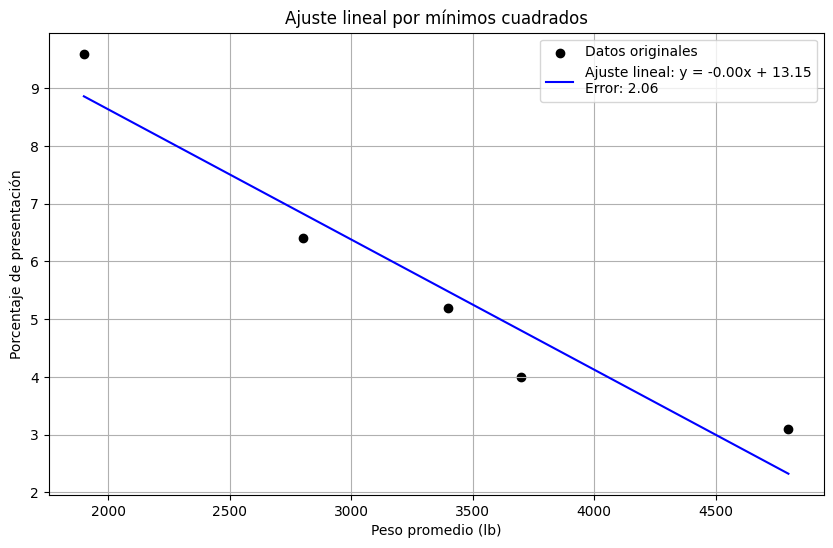

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
pesos_promedio = np.array([4800, 3700, 3400, 2800, 1900])
porcentajes_presentacion = np.array([3.1, 4.0, 5.2, 6.4, 9.6])

# Ajuste lineal
coeficientes = np.polyfit(pesos_promedio, porcentajes_presentacion, 1)
pendiente, interseccion = coeficientes

# Error cuadrático
error = np.sum((porcentajes_presentacion - np.polyval(coeficientes, pesos_promedio))**2)

plt.figure(figsize=(10, 6))
plt.scatter(pesos_promedio, porcentajes_presentacion, color='black', label='Datos originales')
plt.plot(pesos_promedio, np.polyval(coeficientes, pesos_promedio), color='blue', label=f'Ajuste lineal: y = {pendiente:.2f}x + {interseccion:.2f}\nError: {error:.2f}')
plt.xlabel('Peso promedio (lb)')
plt.ylabel('Porcentaje de presentación')
plt.title('Ajuste lineal por mínimos cuadrados')
plt.legend()
plt.grid()
plt.show()